<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/Part3_ShuffleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081))])

train_dataset = torchvision.datasets.MNIST('mnist_data/', train=True, download=True, transform=transform)

train_labels = train_dataset.targets.numpy()
np.random.shuffle(train_labels)
train_dataset.targets = torch.from_numpy(train_labels)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = torchvision.datasets.MNIST('mnist_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



In [2]:
# Define the DNN model
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, loss function, and optimizer
model = DNN()

In [6]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
            Linear-2                   [-1, 64]           8,256
            Linear-3                   [-1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42
----------------------------------------------------------------


In [4]:
# Define a loss function and optimizer
# model = model.to(torch.device('cuda'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
losses = []

for epoch in range(500):

    for batch_idx, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
 
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(images), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
    losses.append(loss.item())

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

test_losses_1 = []
for epoch in range(500):
    for batch_idx, (images, labels) in enumerate(testloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
    print('Test Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(images), len(testloader.dataset),
        100. * batch_idx / len(testloader), loss.item()))
    test_losses_1.append(loss.item())


    

    


Train Epoch: 0 [29984/60000 (100%)]	Loss: 2.316073
Train Epoch: 1 [29984/60000 (100%)]	Loss: 2.310782
Train Epoch: 2 [29984/60000 (100%)]	Loss: 2.283011
Train Epoch: 3 [29984/60000 (100%)]	Loss: 2.321305
Train Epoch: 4 [29984/60000 (100%)]	Loss: 2.309575
Train Epoch: 5 [29984/60000 (100%)]	Loss: 2.296366
Train Epoch: 6 [29984/60000 (100%)]	Loss: 2.296904
Train Epoch: 7 [29984/60000 (100%)]	Loss: 2.281944
Train Epoch: 8 [29984/60000 (100%)]	Loss: 2.285323
Train Epoch: 9 [29984/60000 (100%)]	Loss: 2.271003
Train Epoch: 10 [29984/60000 (100%)]	Loss: 2.292731
Train Epoch: 11 [29984/60000 (100%)]	Loss: 2.284610
Train Epoch: 12 [29984/60000 (100%)]	Loss: 2.313402
Train Epoch: 13 [29984/60000 (100%)]	Loss: 2.302465
Train Epoch: 14 [29984/60000 (100%)]	Loss: 2.275875
Train Epoch: 15 [29984/60000 (100%)]	Loss: 2.273470
Train Epoch: 16 [29984/60000 (100%)]	Loss: 2.297130
Train Epoch: 17 [29984/60000 (100%)]	Loss: 2.284689
Train Epoch: 18 [29984/60000 (100%)]	Loss: 2.315484
Train Epoch: 19 [29984

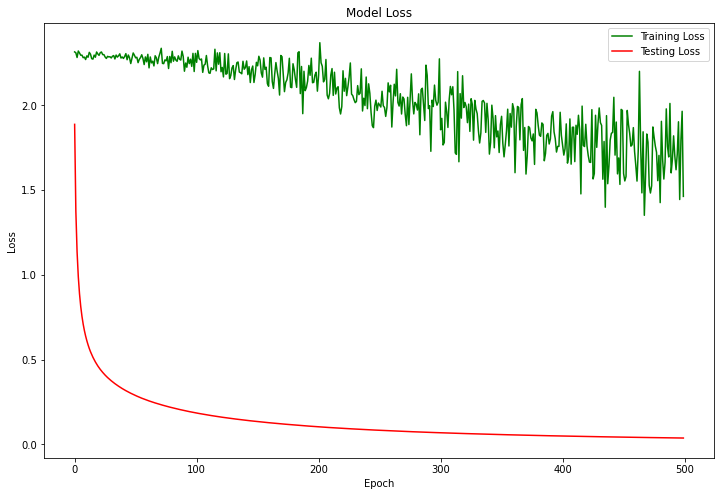

In [5]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Loss')
ax.plot(losses, 'g', label='Training Loss')
ax.plot(test_losses_1, 'r', label='Testing Loss')
ax.legend()

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

In [1]:
# summary(model,(1,28,28))

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F
# from torchsummary import summary
# import torch.optim as optim
# import matplotlib.pyplot as plt

# class DNN2(nn.Module):
#     def __init__(self):
#         super(DNN2, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 12)
#         self.fc2 = nn.Linear(12, 18)
#         # self.fc3 = nn.Linear(18, 10)
#         self.fc4 = nn.Linear(18, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         # x = F.relu(self.fc3(x))
#         x = self.fc4(x)
#         return F.log_softmax(x, dim=1)

# # Initialize the model, loss function, and optimizer
# model2 = DNN2()